# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm_notebook
from scipy import stats
from scipy import integrate

In [71]:
df = pd.read_csv('/mnt/c/users/我的电脑/desktop/springboard/EDA_human_temperature/data/human_body_temperature.csv')

<p><b>Question 1:
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
</li>
    </b></p>

In [15]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


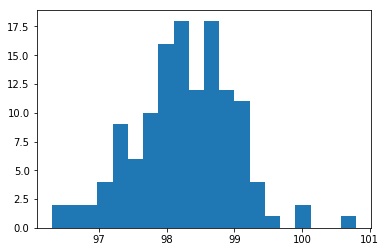

In [16]:
plt.hist(df['temperature'],bins=20)
plt.show()

In [17]:
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

<p>Using the Pearson's test there is a 25.6% chance this data came from a normal distribution.</p>

<p><b>Question 2:
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul></b></p>

In [19]:
df['temperature'].size

130

<p>130 is greater than 30 so the data size is sufficiently large. The observations appear independent under the assumptions that these measurements are different individuals.</p>

<p><b>Question 3
<li>Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul></b></p>

<p><b>Bootstrap</b></p>

In [13]:
trials=10**6
means=np.empty(trials)
for n in tqdm_notebook(range(trials)):
    experiment=df['temperature'].sample(130,replace=True)
    means[n]=np.mean(experiment)
p=np.sum(means>=98.6)/len(means)
print('p=',p,' stdm=',np.std(means))


p= 0.0  stdm= 0.06411042332668299


<p>Given the p-value I would reject the null hypothesis.</p>

<p><b>Frequentist Statistical Testing</b></p>
<p>You would use one-sample as there are not independent groups</p>

In [3]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
print(mean,std,std/np.sqrt(130))

98.24923076923075 0.730357778905038 0.06405661469519337


In [25]:
def dist(x):
    return 1/np.sqrt(2*np.pi)/0.06405661469519337*np.exp(-(x-98.24923076923075)**2/2/0.06405661469519337**2)

p=integrate.quad(dist,98.6,102)[0]

print('p=',p)

p= 2.176157582934709e-08


<p> It does not look like the population mean is 98.6 using either method due to the extremely small p-values.</p>
<p>You would use a Z-statistic because the sample size is large.</p>

In [19]:
print('Z =',(98.6-mean)/std*np.sqrt(130))

Z = 5.4759252020785585


In [26]:
def dist(x):
    sig = std/np.sqrt(130)
    mu = 98.24923076923075
    return 1/sig/np.sqrt(2*np.pi)*np.exp(-(x-mu)**2/2/sig**2)

print('p =',integrate.quad(dist,98.6,102)[0])



p = 2.176157582934709e-08


<p>Given the Z-statistic I would reject the null hypothesis that the mean temperature for this data set is 98.6<sup>o</sup>F.</p>

In [27]:
print('t =',(98.6-mean)/std*np.sqrt(130))

t = 5.4759252020785585


In [28]:
def dist(x,v=129):
    return  math.gamma((v+1)/2)/np.sqrt(v*np.pi)/math.gamma(v/2)/(1+x**2/v)**((v+1)/2)

print('p =',integrate.quad(dist,(98.6-mean)/std/np.sqrt(129),5)[0])

p = 0.4831673453683928


<p>Given the t-statistic I would not reject the hypothesis that the mean temperature is 98.6<sup>o</sup>F.</p>

  <p><b>Question 4
    <ol>
    Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
    </ol></b></p>

<p>choosing data points</p>

In [62]:
values=np.array(df['temperature'].sample(10))
values

array([98.6, 98.9, 97.9, 98.4, 98.6, 98.2, 98.2, 96.7, 98. , 98.5])

<p>Now because the sample is not sufficiently large the t statistic is the correct test to use</p>

In [63]:
mean=np.mean(values)
std=np.std(values)
print(mean,std)

98.2 0.5761944116355163


In [64]:
def dist(x):
    v=9
    return  math.gamma((v+1)/2)/np.sqrt(v*np.pi)/math.gamma(v/2)/(1+x**2/v)**((v+1)/2)

print('p =',integrate.quad(dist,(98.6-mean)/std*np.sqrt(10),5)[0])

p = 0.027514349845814943


<p>Given this p-value I would not reject the null hypothesis.</p>

In [65]:
print('Z =',(98.6-mean)/std*np.sqrt(10))

Z = 2.1952851997937644


In [66]:
def dist(x):
    sig = std/np.sqrt(10)
    mu = mean
    return 1/sig/np.sqrt(2*np.pi)*np.exp(-(x-mu)**2/2/sig**2)

print('p =',integrate.quad(dist,98.6,100)[0])

p = 0.014071572948134138


<p>The t-statistic accepts 98.6<sup>o</sup>F as a reasonable value and the z-statistic does not using $\alpha = 0.05$.</p>

<p><b>Question 5:
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul></b></p>

<p><b>Bootstrap</b></p>

In [67]:
data = df['temperature'].sample(1000,replace=True)
percents = np.percentile(data,[2.5,97.5])
print(percents)

[96.7 99.9]


<p>Using $\alpha = 0.05$</p>

<p><b>Frequentist</b></p>

In [68]:
data=np.array(df['temperature'])
mean=np.mean(data)
std=np.std(data)
print('[',mean-1.959963984540*std,',',mean+1.959963984540*std,']')

[ 96.81775582674824 , 99.68070571171326 ]


<p>Using $\alpha = 0.05$</p>

<p>The bootstarp method gave the temperatures of 99.9<sup>o</sup> F and above as abnormal, as well as the temperatures of 96.7<sup>o</sup> F and below as abnormal. The Frequentist method gave similar results. The frequentist method gave the temperatures of 99.6<sup>o</sup> F and above as abnormal, as well as the temperatures of 96.8<sup>o</sup> F and below as abnormal.</p>

<h1>Question 6:</h1>
<li>Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</li>

In [72]:
male_data = df[df['gender']=='M']
female_data = df[df['gender']=='F']

In [146]:
np.mean(male_data)

temperature    98.104615
heart_rate     73.369231
dtype: float64

In [147]:
np.mean(female_data)

temperature    98.393846
heart_rate     74.153846
dtype: float64

In [80]:
trials=10**4
mean_difference=np.empty(trials)
for m in tqdm_notebook(range(1000)):
    group_1=df['temperature'].sample(male_data.size,replace=True)
    group_2=df['temperature'].sample(female_data.size,replace=True)
    mean_difference[m]=np.mean(group_2)-np.mean(group_1)
p=sum(np.mean(male_data['temperature'])-np.mean(female_data['temperature'])\
   >= mean_difference)/trials
print('p=',p)


p= 0.0


<p>Given the p-value for the bootstrap method the difference in body temperature does appear to be a statisticaly signifigant differnce between female and male body temperature.</p>